In [7]:
from genetic_algorithm import *
from simulated_annealing import *


import time
import numpy as np
import matplotlib.pyplot as plt

import argparse
from graph import UndirectedGraph
from hill_climbing import hill_climbing
from simulated_annealing import simulated_annealing
from genetic_algorithm import genetic_algorithm
import utils


%matplotlib inline

In [6]:
def cities_and_graph(file_name):
    graph = UndirectedGraph()
    with open(file_name) as file:
        cities = set()
        for line in file.readlines()[1:]:
            city_1, city_2, distance = line.split("    ")

            distance = int(distance)

            graph.add_edge(city_1, city_2, distance)
            cities.add(city_1)
            cities.add(city_2)

        cities = list(cities)

        return cities, graph
        



In [8]:
def test_genetic_algorithm(cities, graph, n_iters=5):
    best_solution = None
    best_solution_score = float("inf")

    average_runtime = 0

    for _ in range(n_iters):
        start_time = time.perf_counter()


        solution, solution_score = genetic_algorithm(cities= cities ,graph=graph, population_size= 150, percent=0.7, generation=100)

        end_time = time.perf_counter()

        average_runtime += end_time - start_time

        
        if solution_score < best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    average_runtime /= n_iters

    return average_runtime, best_solution, best_solution_score

In [10]:

def test_simulated_annealing(cities, graph, generation, n_iters=5):
    best_solution = None
    best_solution_score = float("inf")

    average_runtime = 0

    for _ in range(n_iters):
        start_time = time.perf_counter()

        solution, solution_score = simulated_annealing(cities, graph, generation)

        end_time = time.perf_counter()

        average_runtime += end_time - start_time

        
        if solution_score < best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    average_runtime /= n_iters

    return average_runtime, best_solution, best_solution_score


In [9]:
def test_hill_climbing(cities, graph, n_iters = 5):
    best_solution = None
    best_solution_score = float("inf")

    average_runtime = 0

    for _ in range(n_iters):
        start_time = time.perf_counter()

        solution, solution_score = hill_climbing(cities, graph, generation=100)

        end_time = time.perf_counter()

        average_runtime += end_time - start_time

        if solution_score < best_solution_score:
            best_solution = solution
            best_solution_score = solution_score

    average_runtime /= n_iters

    return average_runtime, best_solution, best_solution_score

In [11]:

def test():
    filenames = [("8_romania.txt", cities_and_graph("8_romania.txt")), ("16_romania.txt", cities_and_graph("16_romania.txt")), ("20_romania.txt", cities_and_graph("20_romania.txt"))]

    result = {} 
    
    for filename, file in filenames:
        print(f"Running test on {filename}")
        cities, graph = file

        hc_time, _, hc_score = test_hill_climbing(cities, graph)
        sa_time, _, sa_score = test_simulated_annealing(cities, graph, 1000)
        ga_time, _, ga_score = test_genetic_algorithm(cities, graph)

        result[int(filename.split("_")[0])] = {
            "HC.": [hc_time, hc_score],
            "SA.": [sa_time, sa_score],
            "GA.": [ga_time, ga_score]
        }

        print("\n%20s    Time(s)   Value" % "Algorithm")
        print("=============================================")
        print("%20s    %.2f s   %.2f miles" % ("Hill climbing", hc_time, hc_score))
        print("%20s    %.2f s   %.2f miles" % ("Simulated annealing", sa_time, sa_score))
        print("%20s    %.2f s   %.2f miles" % ("Genetic algorithm", ga_time, ga_score))
        print("\n")

    return result


In [12]:
result = test()

Running test on 8_romania.txt

           Algorithm    Time(s)   Value
       Hill climbing    0.08 s   714.00 miles
 Simulated annealing    0.00 s   720.00 miles
   Genetic algorithm    0.33 s   1860.00 miles


Running test on 16_romania.txt

           Algorithm    Time(s)   Value
       Hill climbing    0.57 s   1269.00 miles
 Simulated annealing    0.02 s   3539.00 miles
   Genetic algorithm    1.00 s   2445.00 miles


Running test on 20_romania.txt

           Algorithm    Time(s)   Value
       Hill climbing    1.58 s   3847.00 miles
 Simulated annealing    0.08 s   2804.00 miles
   Genetic algorithm    1.54 s   9224.00 miles




<BarContainer object of 9 artists>

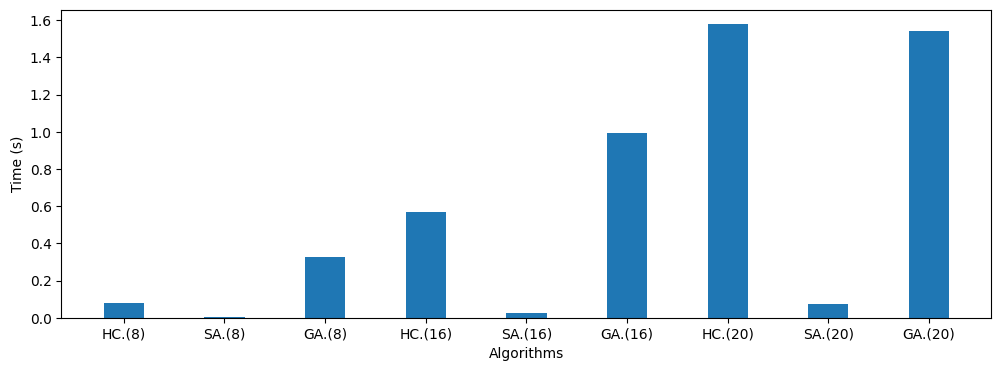

In [13]:
x = []
y_times = []
y_score = []

fig = plt.subplots(figsize =(12, 4))
for n_items, res in result.items():
    algs = map(lambda a: f"{a}({n_items})", res.keys())
    times = list(map(lambda x: x[0], res.values()))
    score = list(map(lambda x: x[1], res.values()))

    x.extend(algs)
    y_times.extend(times)
    y_score.extend(score)

plt.xlabel(f"Algorithms")
plt.ylabel("Time (s)")
plt.bar(x, y_times, width = 0.4)

<BarContainer object of 9 artists>

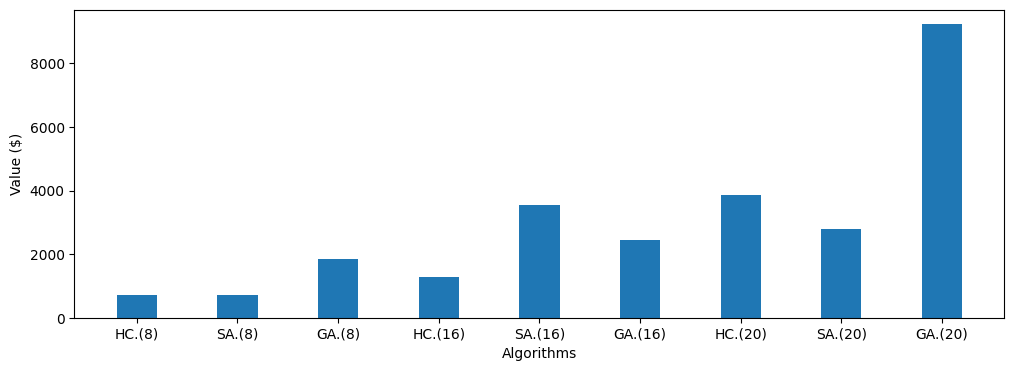

In [14]:
fig = plt.subplots(figsize =(12, 4))
plt.xlabel(f"Algorithms")
plt.ylabel("Value ($)")
plt.bar(x, y_score, width = 0.4)